## 广义线性回归模型

### Nelder (1972)对线性模型做了两个方面的推广：

#### 链接函数 + 误差函数  来定义广义线性模型，广义线性模型能解决更广泛的问题。

#### 1. 链接函数：设定自变量和因变量的关系
#### 2. 误差函数：设定误差项的分布假设
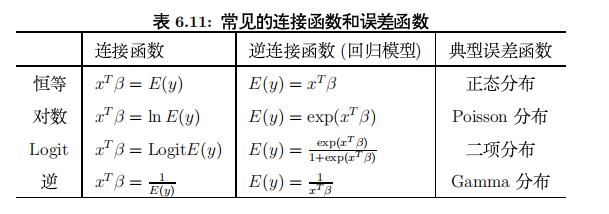
#### R语言中使用glm(formula, family，data)函数定义各种广义线性模型
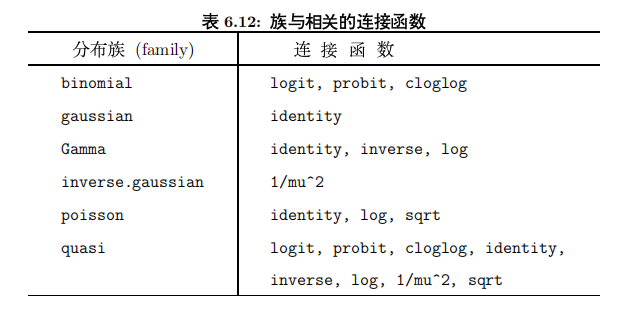

## 1. 正态分布族

### 假设误差项服从正态分布，自变量和因变量服从线性关系，
### 说白了就是一般的线性回归模型，用于回答自变量变化对因变量的线性预测

fm <- glm(formula, family = gaussian, data = data.frame)

或

fm <- lm(formula, data = data.frame)

In [2]:
#举例：下面是13位男性的血压、体重和年龄，求体重和年龄对血压的预测作用
blood<-data.frame(
X1=c(76.0, 91.5, 85.5, 82.5, 79.0, 80.5, 74.5,79.0, 85.0, 76.5, 82.0, 95.0, 92.5),
X2=c(50, 20, 20, 30, 30, 50, 60, 50, 40, 55,40, 40, 20),
Y= c(120, 141, 124, 126, 117, 125, 123, 125,132, 123, 132, 155, 147))
blood

X1,X2,Y
<dbl>,<dbl>,<dbl>
76.0,50,120
91.5,20,141
85.5,20,124
82.5,30,126
79.0,30,117
80.5,50,125
74.5,60,123
79.0,50,125
85.0,40,132


In [3]:
fm <- glm(Y ~ X1 + X2, family = gaussian, data = blood)
summary(fm)


Call:
glm(formula = Y ~ X1 + X2, family = gaussian, data = blood)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.0404  -1.0183   0.4640   0.6908   4.3274  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -62.96336   16.99976  -3.704 0.004083 ** 
X1            2.13656    0.17534  12.185 2.53e-07 ***
X2            0.40022    0.08321   4.810 0.000713 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 8.143009)

    Null deviance: 1512.00  on 12  degrees of freedom
Residual deviance:   81.43  on 10  degrees of freedom
AIC: 68.745

Number of Fisher Scoring iterations: 2


In [4]:
fm2 <- lm(Y ~ X1 + X2, data = blood)
summary(fm2)


Call:
lm(formula = Y ~ X1 + X2, data = blood)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0404 -1.0183  0.4640  0.6908  4.3274 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -62.96336   16.99976  -3.704 0.004083 ** 
X1            2.13656    0.17534  12.185 2.53e-07 ***
X2            0.40022    0.08321   4.810 0.000713 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.854 on 10 degrees of freedom
Multiple R-squared:  0.9461,	Adjusted R-squared:  0.9354 
F-statistic: 87.84 on 2 and 10 DF,  p-value: 4.531e-07


## 2. 二项分布族

#### 二项分布中logistic回归模型是最常用的。
#### 当因变量是二分的，例如阳性与阴性、生与死、成功与失败等，我们想了解自变量对因变量阳性、生、成功等几率的影响，可使用logistic回归。这样的分析也常被叫做风险分析。
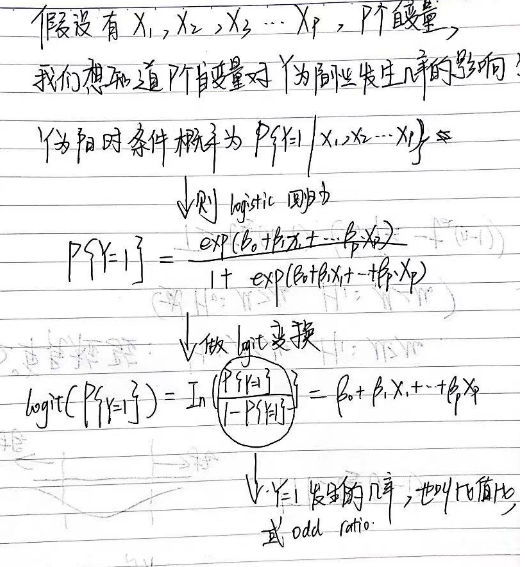
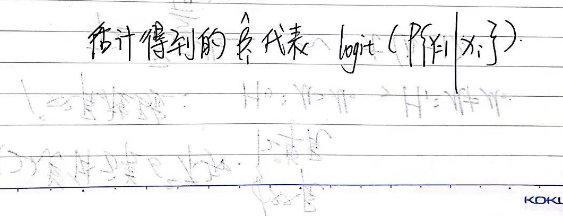

 用glm（）做logistic回归时，对公式formula有两种输入方法：
一种直接输入次数，另一种按一般线性模型的数据格式输入

1. 直接输入次数
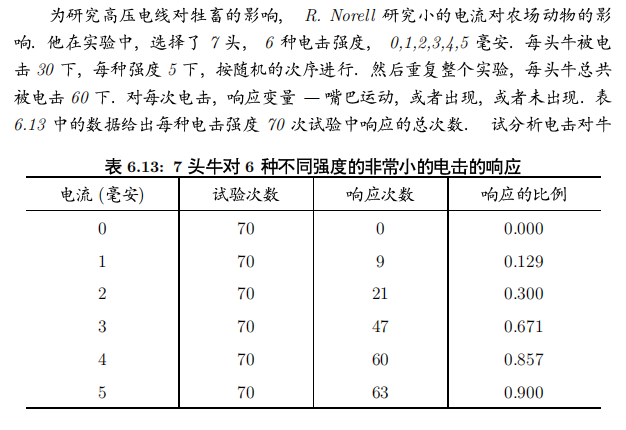

In [5]:
norell<-data.frame(x=0:5, n=rep(70,6), success=c(0,9,21,47,60,63))
norell

x,n,success
<int>,<dbl>,<dbl>
0,70,0
1,70,9
2,70,21
3,70,47
4,70,60
5,70,63


In [6]:
norell$Ymat<-cbind(norell$success, norell$n-norell$success)
norell

x,n,success,Ymat
<int>,<dbl>,<dbl>,"<dbl[,2]>"
0,70,0,"0, 70"
1,70,9,"9, 61"
2,70,21,"21, 49"
3,70,47,"47, 23"
4,70,60,"60, 10"
5,70,63,"63, 7"


In [7]:
glm.sol<-glm(Ymat~x, family=binomial, data=norell)
summary(glm.sol)


Call:
glm(formula = Ymat ~ x, family = binomial, data = norell)

Deviance Residuals: 
      1        2        3        4        5        6  
-2.2507   0.3892  -0.1466   1.1080   0.3234  -1.6679  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -3.3010     0.3238  -10.20   <2e-16 ***
x             1.2459     0.1119   11.13   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 250.4866  on 5  degrees of freedom
Residual deviance:   9.3526  on 4  degrees of freedom
AIC: 34.093

Number of Fisher Scoring iterations: 4


2. 按一般线性模型的数据格式输入

In [8]:
life<-data.frame(
    X1=c(2.5, 173, 119, 10, 502, 4, 14.4, 2, 40, 6.6,
    21.4, 2.8, 2.5, 6, 3.5, 62.2, 10.8, 21.6, 2, 3.4,
    5.1, 2.4, 1.7, 1.1, 12.8, 1.2, 3.5, 39.7, 62.4, 2.4,
    34.7, 28.4, 0.9, 30.6, 5.8, 6.1, 2.7, 4.7, 128, 35,
    2, 8.5, 2, 2, 4.3, 244.8, 4, 5.1, 32, 1.4),
    X2=rep(c(0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
    0, 2, 0, 2, 0, 2, 0),
    c(1, 4, 2, 2, 1, 1, 8, 1, 5, 1, 5, 1, 1, 1, 2, 1,
    1, 1, 3, 1, 2, 1, 4)),
    X3=rep(c(0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1),
    c(6, 1, 3, 1, 3, 1, 1, 5, 1, 3, 7, 1, 1, 3, 1, 1, 2, 9)),
    Y=rep(c(0, 1, 0, 1), c(15, 10, 15, 10))
)
life

X1,X2,X3,Y
<dbl>,<dbl>,<dbl>,<dbl>
2.5,0,0,0
173.0,2,0,0
119.0,2,0,0
10.0,2,0,0
502.0,2,0,0
4.0,0,0,0
14.4,0,1,0
2.0,2,0,0
40.0,2,0,0


In [9]:
glm.sol<-glm(Y~X1+X2+X3, family=binomial, data=life)
summary(glm.sol)


Call:
glm(formula = Y ~ X1 + X2 + X3, family = binomial, data = life)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6960  -0.5842  -0.2828   0.7436   1.9292  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.696538   0.658635  -2.576 0.010000 ** 
X1           0.002326   0.005683   0.409 0.682308    
X2          -0.792177   0.487262  -1.626 0.103998    
X3           2.830373   0.793406   3.567 0.000361 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 67.301  on 49  degrees of freedom
Residual deviance: 46.567  on 46  degrees of freedom
AIC: 54.567

Number of Fisher Scoring iterations: 5


In [10]:
#计算各自变量条件下因变量发生的OR值
coe <- coefficients(glm.sol)
exp(coe)


(Intercept)          X1          X2          X3 
  0.1833170   1.0023287   0.4528579  16.9517789

## 泊松回归

### 单位时间、单位面积或者单位容积内小概率事件发生的频数服从泊松分布。
### 例如，24小时内十字路口车祸次数，100万人中患肺癌次数。
### 探讨这些小概率事件发生的影响因素，可以使用泊松回归。
### 在R中泊松分布和拟泊松分布回归模型如下：

fm <- glm(formula, family = poisson(link = log),
data = data.frame)

fm <- glm(formula, family = quasipoisson(link = log),
data = data.frame)

泊松分布和拟泊松分布唯一区别，前者要求因变量次数为整数，后者不做要求。

In [13]:
#假设y是全国100个马路十字口，1周内车祸次数，x是十字路口某特征变量
x = rnorm(100)
y = rpois(100, exp(1+x))
a <- data.frame(
x = x,
y = y
    )
a

x,y
<dbl>,<int>
-0.3670673,1
-0.6256966,2
1.0929480,8
0.9267109,7
-0.1338707,2
-0.5682125,4
0.8737992,4
-1.7447655,0
-0.2893680,2


In [14]:
glm.fit <- glm(y ~x, family=poisson, data=a)
summary(glm.fit)


Call:
glm(formula = y ~ x, family = poisson, data = a)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-3.00172  -0.94163  -0.02388   0.46007   2.73801  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.04509    0.06494   16.09   <2e-16 ***
x            0.95676    0.04261   22.45   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 594.90  on 99  degrees of freedom
Residual deviance: 101.88  on 98  degrees of freedom
AIC: 380.18

Number of Fisher Scoring iterations: 5
